# 

In [1]:
import os
import scprep


In [2]:
import pandas as pd
import numpy as np
import phate
import scprep



In [3]:
FILEPATHBASE = '/Users/labshare/Workspace/Aqueous/'

SAVEFIGS = True
if SAVEFIGS:
    IMGDIR = os.path.join(FILEPATHBASE,'img/')

In [4]:
# Load Data

A22_340 = scprep.io.load_10X(os.path.join(FILEPATHBASE, 'data', 'A22_340', 'filtered_feature_bc_matrix'))
A23_019 = scprep.io.load_10X(os.path.join(FILEPATHBASE, 'data', 'A23_019', 'filtered_feature_bc_matrix'))
A23_020 = scprep.io.load_10X(os.path.join(FILEPATHBASE, 'data', 'A23_020', 'filtered_feature_bc_matrix'))
A23_055 = scprep.io.load_10X(os.path.join(FILEPATHBASE, 'data', 'A23_055', 'filtered_feature_bc_matrix'))

/Users/labshare/.local/lib/python3.8/site-packages/scprep/io/tenx.py:38: RuntimeWarning: Duplicate gene names detected! Forcing `gene_labels='both'`. Alternatively, try `gene_labels='id'`, `allow_duplicates=True`, or load the matrix with `sparse=False`
  warnings.warn(
/Users/labshare/.local/lib/python3.8/site-packages/scprep/io/tenx.py:38: RuntimeWarning: Duplicate gene names detected! Forcing `gene_labels='both'`. Alternatively, try `gene_labels='id'`, `allow_duplicates=True`, or load the matrix with `sparse=False`
  warnings.warn(
/Users/labshare/.local/lib/python3.8/site-packages/scprep/io/tenx.py:38: RuntimeWarning: Duplicate gene names detected! Forcing `gene_labels='both'`. Alternatively, try `gene_labels='id'`, `allow_duplicates=True`, or load the matrix with `sparse=False`
  warnings.warn(
/Users/labshare/.local/lib/python3.8/site-packages/scprep/io/tenx.py:38: RuntimeWarning: Duplicate gene names detected! Forcing `gene_labels='both'`. Alternatively, try `gene_labels='id'`, `

In [11]:
SampleList = [A22_340, A23_019, A23_020, A23_055]
SampleLabels = ["A22_340", "A23_019", "A23_020", "A23_055"]

In [24]:
filtered_batches = []
for batch in SampleList:
    batch = scprep.filter.filter_library_size(batch, percentile=20, keep_cells='above')
    batch = scprep.filter.filter_library_size(batch, percentile=75, keep_cells='below')
    filtered_batches.append(batch)

In [25]:
Aq_counts, sample_labels = scprep.utils.combine_batches(
    filtered_batches, 
    SampleLabels,
    append_to_cell_names=True
)
del filtered_batches # removes objects from memory


In [26]:
#Filtering

Aq_counts = scprep.filter.filter_rare_genes(Aq_counts, min_cells=10)

Aq_counts, sample_labels = scprep.filter.filter_library_size(Aq_counts, sample_labels, cutoff=200, keep_cells='above')
Aq_counts, sample_labels = scprep.filter.filter_library_size(Aq_counts,  sample_labels, cutoff=70000, keep_cells='below')

Aq_counts = scprep.normalize.library_size_normalize(Aq_counts)

mito_genes = scprep.select.get_gene_set(Aq_counts, starts_with="MT-") # Get all mitochondrial genes
Aq_counts, sample_labels = scprep.filter.filter_gene_set_expression(
    Aq_counts, sample_labels, genes=mito_genes, 
    percentile=95, keep_cells='below')


In [27]:
Aq_counts = scprep.transform.sqrt(Aq_counts)

In [30]:
Aq_counts

,A1BG (ENSG00000121410),A2M (ENSG00000175899),A2M-AS1 (ENSG00000245105),AAAS (ENSG00000094914),AACS (ENSG00000081760),AAED1 (ENSG00000158122),AAGAB (ENSG00000103591),AAK1 (ENSG00000115977),AAMDC (ENSG00000087884),AAMP (ENSG00000127837),...,ZSWIM5 (ENSG00000162415),ZSWIM6 (ENSG00000130449),ZSWIM7 (ENSG00000214941),ZSWIM8 (ENSG00000214655),ZUP1 (ENSG00000153975),ZWILCH (ENSG00000174442),ZXDC (ENSG00000070476),ZYG11B (ENSG00000162378),ZYX (ENSG00000159840),ZZEF1 (ENSG00000074755)
AAAGAACAGCGTCGAA-1_A22_340,0.827153,1.654306,0.0,0.827153,0.0,0.000000,0.0,0.827153,0.0,0.000000,...,0.0,3.509312,0.000000,0.0,0.000000,0.000000,1.432671,0.827153,1.169771,0.827153
AAATGGATCCGTGTCT-1_A22_340,0.000000,1.408451,0.0,0.000000,0.0,1.408451,0.0,1.991850,0.0,1.408451,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.408451,0.000000,0.000000,1.408451
AACCCAACAATGCAGG-1_A22_340,0.000000,0.000000,0.0,0.000000,0.0,1.114003,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.114003,0.000000,1.114003,1.575438
AACGTCAAGGACTATA-1_A22_340,0.000000,0.000000,0.0,0.000000,0.0,0.968639,0.0,2.165944,0.0,0.000000,...,0.0,2.372672,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.968639,0.000000
AAGTGAAGTTCCACGG-1_A22_340,0.000000,1.927716,0.0,0.000000,0.0,0.000000,0.0,1.363101,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,1.363101,1.363101,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TGACAACTCCATGCTC-1_A23_020,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.754386,0.000000
TGGGAAGGTAAATACG-1_A23_020,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,2.018452,1.427261,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
TTAACTCGTGCTAGCC-1_A23_020,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,2.411214,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
TTAACTCTCTCACATT-1_A23_020,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.516719,0.000000,0.000000,0.000000


In [28]:
phate_operator = phate.PHATE(n_jobs=-2)

Y_phate = phate_operator.fit_transform(Aq_counts)

Calculating PHATE...
  Running PHATE on 180 observations and 9748 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.37 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.04 seconds.
    Calculating affinities...
    Calculated affinities in 0.22 seconds.
  Calculated graph and diffusion operator in 0.90 seconds.
  Calculating optimal t...
    Automatically selected t = 23
  Calculated optimal t in 0.10 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.30 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 0.74 seconds.
Calculated PHATE in 2.07 seconds.


/Users/labshare/.local/lib/python3.8/site-packages/scprep/plot/utils.py:104: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Axes: xlabel='PHATE1', ylabel='PHATE2'>

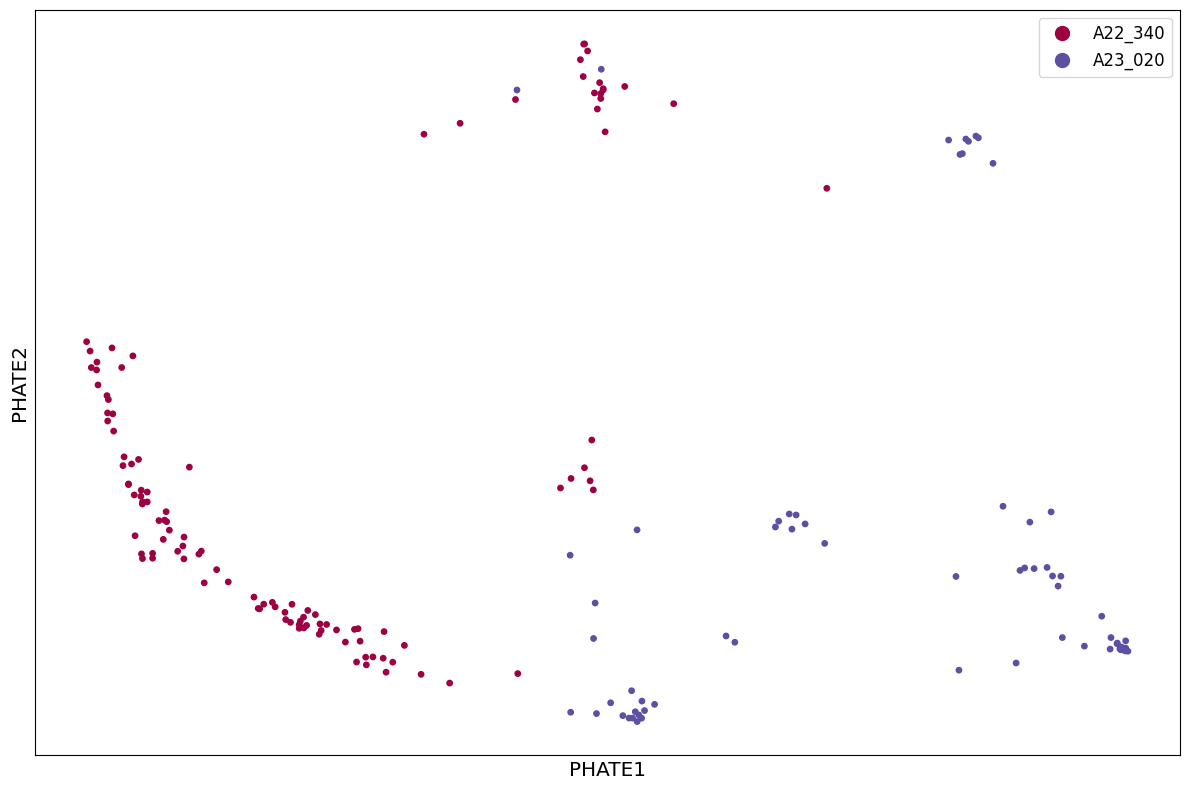

In [29]:
scprep.plot.scatter2d(Y_phate, c=sample_labels, figsize=(12,8), cmap="Spectral",
                      ticks=False, label_prefix="PHATE")

/Users/labshare/.local/lib/python3.8/site-packages/phate/cluster.py:57: FutureWarning: k is deprecated. Please use n_clusters in future.
  warnings.warn(
/Users/labshare/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/labshare/.local/lib/python3.8/site-packages/scprep/plot/utils.py:104: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


NameError: name 'fig' is not defined

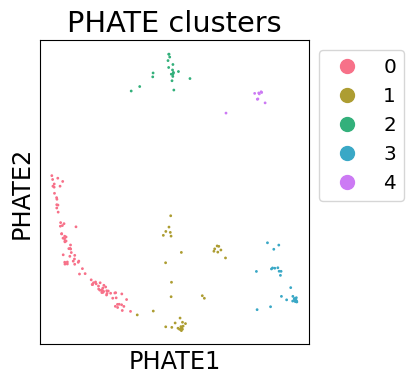

In [35]:
import seaborn as sns
clusters = phate.cluster.kmeans(phate_operator, k=5)

scprep.plot.scatter2d(Y_phate, c=clusters, cmap=sns.husl_palette(5), s=1,
                      figsize=(4.3,4), ticks=None, label_prefix='PHATE',
                     legend_anchor=(1,1), fontsize=12, title='PHATE clusters')
